In [1]:
# Sneha Dubey & Hanzhe Zhang
# Dr. Chen
# CSCI 185
# 20 March 2024
# Final Project

In [2]:
# Imports

import re
import sys
import math
import string
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.frequent_patterns import apriori,association_rules
#np.set_printoptions(threshold=sys.maxsize) #OPTIONAL: just to check entirety of prints

In [3]:
# FIRST TASK: information retrieval–– based on a specific user query, return the most relevant job posting in the dataset

In [4]:
# Ask for user query regarding job listings

query = input('Please enter your query related to job postings: ')

Please enter your query related to job postings: Nurse


In [5]:
# Load the data from the csv file to a dataframe

originalData = pd.read_csv("dataset.csv")
#originalData.info()
#originalData.head()

In [6]:
# Begin pre-processing the data (create copy to protect original data)

preprocessedData = originalData

In [7]:
# Drop unnecessary columns & take care of empty cells

preprocessedData = preprocessedData.drop(columns = ['Job Id', 'latitude', 'longitude', 'Contact'], axis = 1)
for column in preprocessedData.columns:
    preprocessedData[column].fillna('nan', inplace = True)
#preprocessedData.info()

In [8]:
# Beginning Vector Space Model

# Moving all documents to be individual lists in a larger 'documents' list for ease
documents = []
for row in range(0,len(preprocessedData.axes[0])): # use tokenizedData if data was tokenized
    currDoc = ""
    for column in preprocessedData:
        currDoc += " " + str(preprocessedData.at[row, column])
    documents.append(currDoc)
documents.append(query)
#print(documents)

In [9]:
# TF-IDF Vectorization

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_martix = tfidf_matrix.toarray()
print('Vocab words: \n', feature_names)
print('TF-IDF Matrix: \n', tfidf_matrix.toarray())

Vocab words: 
 ['001' '002' '008' ... 'zoning' 'zts' 'zuckerberg']
TF-IDF Matrix: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
# Find cosine similarities

cosine_similarities = cosine_similarity(tfidf_matrix)
#print('cosine similarities: ', cosine_similarities)

num_rows, num_columns = cosine_similarities.shape
ranked_order = np.argsort(-cosine_similarities[:num_rows-1, num_columns-1], axis = 0)
#print('Ranked order of documents: ', ranked_order)

In [11]:
# Print job listings most relevant to the user's query

print('The job posting most relevant to your query', '(' + query + ')', 'is Job ID: ', originalData['Job Id'].loc[originalData.index[ranked_order[0]]], '\n')
print('Information about this position: \n')
for column in originalData:
    if column == 'Job Id':
        continue
    print(column, ': ', originalData[column].loc[originalData.index[ranked_order[0]]], '\n')
    
print('The next two most relevant jobs\' IDs are: ', originalData['Job Id'].loc[originalData.index[ranked_order[1]]],' and ', originalData['Job Id'].loc[originalData.index[ranked_order[2]]],' respectively')

The job posting most relevant to your query (Nurse) is Job ID:  2576700000000000.0 

Information about this position: 

Experience :  5 to 10 Years 

Qualifications :  M.Tech 

Salary Range :  $60K-$103K 

location :  Mbabane 

Country :  Eswatini 

latitude :  26.5225 

longitude :  31.4659 

Work Type :  Full-Time 

Company Size :  109625 

Job Posting Date :  11/30/2021 

Preference :  Female 

Contact Person :  Jimmy Brown 

Contact :  4946479964 

Job Title :  Registered Nurse 

Role :  Charge Nurse 

Job Portal :  Indeed 

Job Description :  A Charge Nurse leads and supervises nursing staff, coordinates patient care, and ensures efficient operations within a healthcare unit or department. 

Benefits :  {'Health Insurance, Retirement Plans, Flexible Work Arrangements, Employee Assistance Programs (EAP), Bonuses and Incentive Programs'} 

skills :  Nursing leadership Charge nurse responsibilities Team coordination 

Responsibilities :  Supervise nursing staff and allocate patient a

In [12]:
# SECOND TASK: calculate the association rules between the benefits provided by employers in this dataset

In [13]:
# Create a list of lists that holds the benefits in every job listing

benefits = []

for row in range(0,len(preprocessedData.axes[0])):
    benefits.append(preprocessedData.at[row, 'Benefits'][2:-2].split(','))

#print(benefits)

In [14]:
# Perform association rules mining with support = 10%, confidence = 75%
    # support = 10% means the benefits together show up in at least 200 job listings
    # confidence = 75% means that 75% of the time the evaluated association rule rings true

encoder = TransactionEncoder()
fittedBenefits = encoder.fit_transform(benefits)
#print(fittedBenefits)

benefitsDF = pd.DataFrame(fittedBenefits, columns = encoder.columns_)

frequentBenefits = apriori(benefitsDF, min_support = 0.10, use_colnames = True)
#print(frequentBenefits)

associationRules = association_rules(frequentBenefits, metric = 'confidence', min_threshold = 0.75)
associationRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Bonuses and Incentive Programs),( Employee Discounts),0.249750,0.192192,0.192192,0.769539,4.004008,0.144192,3.505183,1.000000
1,( Employee Discounts),( Bonuses and Incentive Programs),0.192192,0.249750,0.192192,1.000000,4.004008,0.144192,inf,0.928748
2,(Transportation Benefits),( Bonuses and Incentive Programs),0.100601,0.249750,0.100601,1.000000,4.004008,0.075476,inf,0.834168
3,( Casual Dress Code),( Financial Counseling),0.106607,0.201702,0.106607,1.000000,4.957816,0.085104,inf,0.893557
4,( Casual Dress Code),( Flexible Spending Accounts (FSAs)),0.106607,0.106607,0.106607,1.000000,9.380282,0.095242,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
582,"( Transportation Benefits, Employee Assistance...","( Profit-Sharing, Parental Leave, Tuition Re...",0.103103,0.103103,0.103103,1.000000,9.699029,0.092473,inf,1.000000
583,"(Employee Assistance Programs (EAP), Tuition ...","( Profit-Sharing, Parental Leave, Transporta...",0.103103,0.103103,0.103103,1.000000,9.699029,0.092473,inf,1.000000
584,( Transportation Benefits),"( Profit-Sharing, Parental Leave, Employee As...",0.103103,0.103103,0.103103,1.000000,9.699029,0.092473,inf,1.000000
585,( Tuition Reimbursement),"( Profit-Sharing, Parental Leave, Employee As...",0.103103,0.103103,0.103103,1.000000,9.699029,0.092473,inf,1.000000


In [15]:
# THIRD TASK: correlation analysis–– figure out what the relationship between 'Qualifications' and 'Salary Range' is

In [16]:
# Create a new dataframe with only the columns 'Qualifications' and 'Salary Range'

QvS = pd.DataFrame()
QvS = preprocessedData.filter(['Qualifications', 'Salary Range'], axis = 1)
QvS

,Qualifications,Salary Range
0,M.Tech,$59K-$99K
1,BCA,$56K-$116K
2,PhD,$61K-$104K
3,PhD,$65K-$91K
4,MBA,$64K-$87K
...,...,...
1993,M.Tech,$63K-$111K
1994,MCA,$60K-$116K
1995,BBA,$56K-$125K
1996,M.Com,$60K-$80K


In [17]:
# Replace every string in 'Salary Range' with the mean salary of the job based on its original range

for row in range(0,len(QvS.axes[0])):
    i = QvS.at[row,'Salary Range']
    salarySplit = i.split('-')
    value1 = int(salarySplit[0][1:-1])
    value2 = int(salarySplit[1][1:-1])
    
    mean = (value1+value2)/2
    QvS.at[row,'Salary Range'] = mean

QvS['Salary Range'] = QvS['Salary Range'].astype(float)
QvS

,Qualifications,Salary Range
0,M.Tech,79.0
1,BCA,86.0
2,PhD,82.5
3,PhD,78.0
4,MBA,75.5
...,...,...
1993,M.Tech,87.0
1994,MCA,88.0
1995,BBA,90.5
1996,M.Com,70.0


In [18]:
# Numerically encode the individual Qualification levels to allow for correlation analysis

print("Original Column Names: ", QvS['Qualifications'].unique())

qualificationMapping = {
    'BA': 1,
    'B.Com': 2,
    'BCA': 3,
    'BBA': 4,
    'B.Tech': 5,
    'M.Com': 6,
    'MCA': 7,
    'MBA': 8,
    'M.Tech': 9,
    'PhD': 10,
}


QvS['Qualifications'] = QvS['Qualifications'].map(qualificationMapping)
QvS

Original Column Names:  ['M.Tech' 'BCA' 'PhD' 'MBA' 'MCA' 'M.Com' 'BBA' 'B.Tech' 'B.Com' 'BA']


,Qualifications,Salary Range
0,9,79.0
1,3,86.0
2,10,82.5
3,10,78.0
4,8,75.5
...,...,...
1993,9,87.0
1994,7,88.0
1995,4,90.5
1996,6,70.0


In [19]:
# Calculate the correlation matrix between 'Qualifications' and 'Salary Range'

QvS.corr()

,Qualifications,Salary Range
Qualifications,1.000000,0.004525
Salary Range,0.004525,1.000000


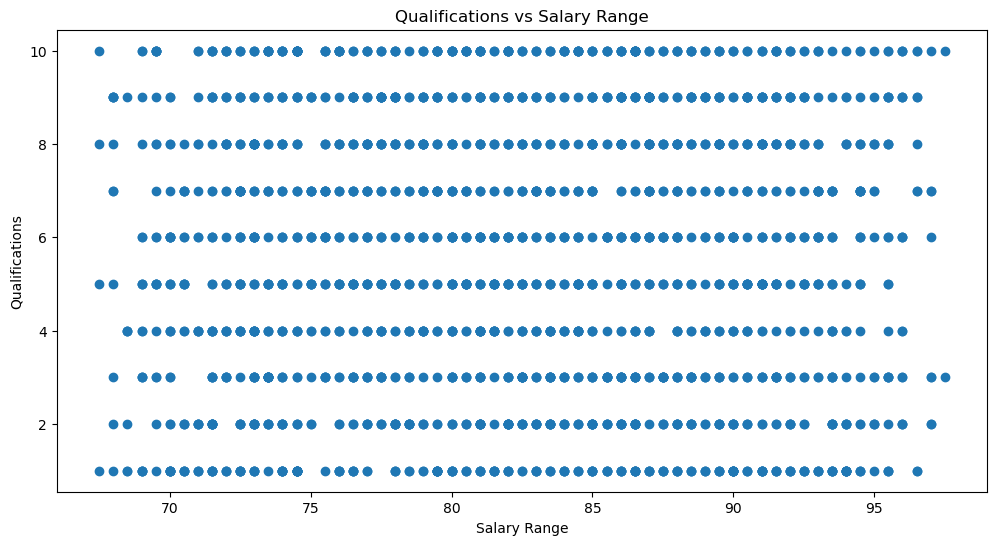

In [20]:
# Plot the Data 'Qualifications' vs. 'Salary Range'

plt.figure(figsize=(12, 6))
plt.plot(QvS['Salary Range'], QvS['Qualifications'], 'o')
plt.xlabel('Salary Range')
plt.ylabel('Qualifications')
plt.title('Qualifications vs Salary Range')
plt.show()

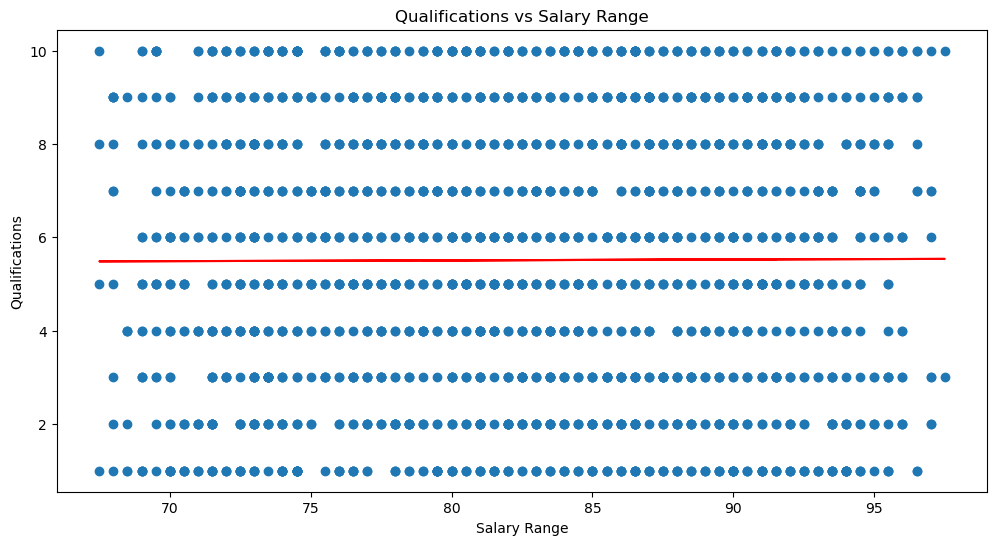

In [21]:
# Visually represent the relationship between 'Qualifications' and 'Salary Range'

linregress = sp.stats.linregress(QvS['Salary Range'], QvS['Qualifications'])
plt.figure(figsize=(12, 6))
plt.plot(QvS['Salary Range'], QvS['Qualifications'], 'o')
plt.plot(QvS['Salary Range'], linregress.intercept + linregress.slope*QvS['Salary Range'], 'r', label='fitted line')
plt.xlabel('Salary Range')
plt.ylabel('Qualifications')
plt.title('Qualifications vs Salary Range')
plt.show()